
# INITIALIZE AND IMPORT DATASET


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:/Users/windows/Desktop/IBM/OnlineRetail.csv',encoding='latin1')


# FIRST FIVE ROWS OF THE DATASET


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010,3.39,17850.0,United Kingdom



# SUMMARISE DATA


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



# TYPE OF VARIABLES


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# CREATING A NEW VARIABLE

In [6]:
df['sales'] = df['Quantity']*df['UnitPrice']

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010,3.39,17850.0,United Kingdom,20.34


# DISCARDING NEGATIVE VAUES

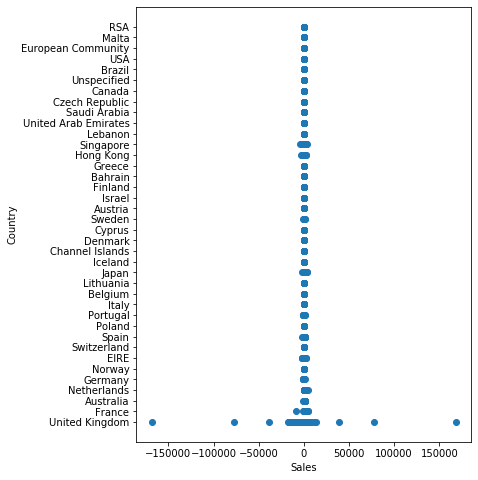

In [8]:
fig = plt.figure(figsize=(6,8))
plt.scatter(df['sales'],df['Country'])
plt.xlabel('Sales')
plt.ylabel('Country')
plt.show()

In [9]:
df1 = df[df['sales']>0]

In [10]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010,3.39,17850.0,United Kingdom,20.34


# CREATING NEW DATAFRAME WITH NECESSARY COLUMNS

In [11]:
df2 = df1[['sales','Country','InvoiceDate','CustomerID']]

In [12]:
df2.head()

,sales,Country,InvoiceDate,CustomerID
0,15.30,United Kingdom,12-01-2010,17850.0
1,20.34,United Kingdom,12-01-2010,17850.0
2,22.00,United Kingdom,12-01-2010,17850.0
3,20.34,United Kingdom,12-01-2010,17850.0
4,20.34,United Kingdom,12-01-2010,17850.0


# MANAGING OUTLIERS

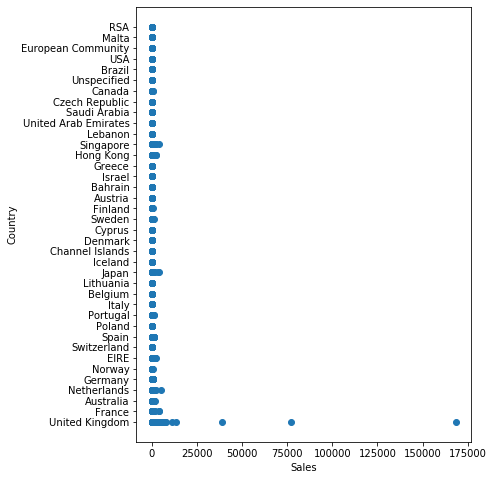

In [13]:
fig = plt.figure(figsize=(6,8))
plt.scatter(df2['sales'],df2['Country'])
plt.xlabel('Sales')
plt.ylabel('Country')
plt.show()

In [14]:
df2[df2['sales']>25000]

,sales,Country,InvoiceDate,CustomerID
61619,77183.6,United Kingdom,18-01-2011,12346.0
222680,38970.0,United Kingdom,06-10-2011,15098.0
540421,168469.6,United Kingdom,12-09-2011,16446.0


In [15]:
df3 = df2[df2['sales']<25000]

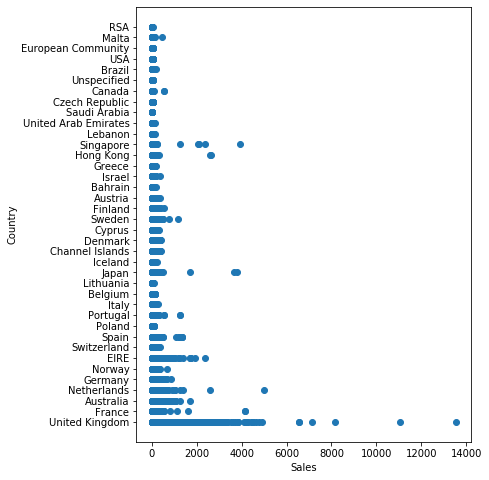

In [16]:
fig = plt.figure(figsize=(6,8))
plt.scatter(df3['sales'],df3['Country'])
plt.xlabel('Sales')
plt.ylabel('Country')
plt.show()

In [17]:
df3 = df2[df2['sales']<6000]

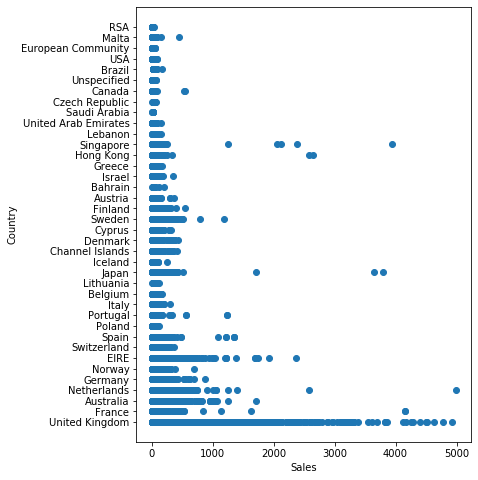

In [18]:
fig = plt.figure(figsize=(6,8))
plt.scatter(df3['sales'],df3['Country'])
plt.xlabel('Sales')
plt.ylabel('Country')
plt.show()

# COUNTY WISE SALE AROUND THE GLOBE

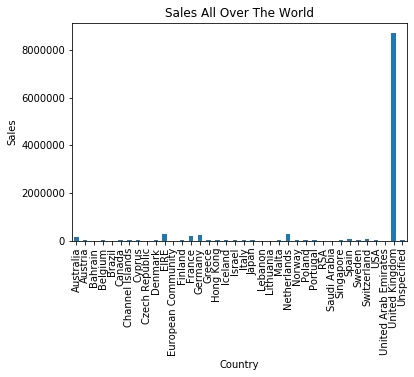

In [19]:
df3.groupby(['Country'])['sales'].sum().plot(kind='bar')
plt.title('Sales All Over The World')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show()

# COMPANY'S TOTAL CUSTOMERS AROUND THE GLOBE

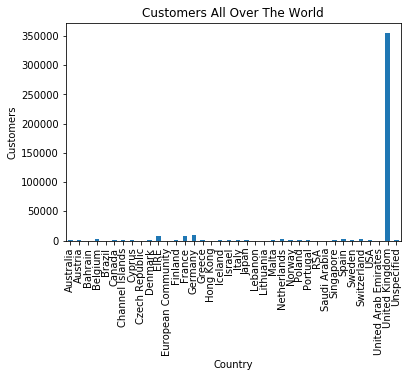

In [34]:
df3.groupby(['Country'])['CustomerID'].count().plot(kind='bar')
plt.title('Customers All Over The World')
plt.xlabel('Country')
plt.ylabel('Customers')
plt.show()

# EXTRACTING,SORTING MONTH AND YEAR FOR SALES

In [21]:
df3.head()

,sales,Country,InvoiceDate,CustomerID
0,15.30,United Kingdom,12-01-2010,17850.0
1,20.34,United Kingdom,12-01-2010,17850.0
2,22.00,United Kingdom,12-01-2010,17850.0
3,20.34,United Kingdom,12-01-2010,17850.0
4,20.34,United Kingdom,12-01-2010,17850.0


In [22]:
df4 = df3['InvoiceDate'].str.split('-',expand=True)

In [23]:
df4.head()

,0,1,2
0,12,01,2010
1,12,01,2010
2,12,01,2010
3,12,01,2010
4,12,01,2010


In [32]:
df3['month'] = df4[1]
df3['year'] = df4[2]

In [25]:
df3

,sales,Country,InvoiceDate,CustomerID,month,year
0,15.30,United Kingdom,12-01-2010,17850.0,01,2010
1,20.34,United Kingdom,12-01-2010,17850.0,01,2010
2,22.00,United Kingdom,12-01-2010,17850.0,01,2010
3,20.34,United Kingdom,12-01-2010,17850.0,01,2010
4,20.34,United Kingdom,12-01-2010,17850.0,01,2010
...,...,...,...,...,...,...
541904,10.20,France,12-09-2011,12680.0,09,2011
541905,12.60,France,12-09-2011,12680.0,09,2011
541906,16.60,France,12-09-2011,12680.0,09,2011
541907,16.60,France,12-09-2011,12680.0,09,2011


In [26]:
df3 = df3.sort_values('year')
df3

,sales,Country,InvoiceDate,CustomerID,month,year
0,15.30,United Kingdom,12-01-2010,17850.0,01,2010
28251,0.55,United Kingdom,13-12-2010,16726.0,12,2010
28252,23.60,United Kingdom,13-12-2010,16726.0,12,2010
28253,5.90,United Kingdom,13-12-2010,16726.0,12,2010
28254,11.80,United Kingdom,13-12-2010,16726.0,12,2010
...,...,...,...,...,...,...
209430,4.25,United Kingdom,06-01-2011,15039.0,01,2011
209429,1.30,United Kingdom,06-01-2011,15039.0,01,2011
209428,1.30,United Kingdom,06-01-2011,15039.0,01,2011
209440,4.25,United Kingdom,06-01-2011,15039.0,01,2011


In [27]:
df5 = df3[(df3['year']>'2009') & (df3['year']<'2011')]
df5 = df5.sort_values('month')
df5

,sales,Country,InvoiceDate,CustomerID,month,year
0,15.30,United Kingdom,12-01-2010,17850.0,01,2010
1019,2.10,United Kingdom,12-01-2010,15012.0,01,2010
1001,1.25,United Kingdom,12-01-2010,14729.0,01,2010
999,2.50,United Kingdom,12-01-2010,14729.0,01,2010
983,7.65,United Kingdom,12-01-2010,14729.0,01,2010
...,...,...,...,...,...,...
41658,4.21,United Kingdom,23-12-2010,NaN,12,2010
41651,2.51,United Kingdom,23-12-2010,NaN,12,2010
41659,3.36,United Kingdom,23-12-2010,NaN,12,2010
41662,15.18,United Kingdom,23-12-2010,NaN,12,2010


In [28]:
df6 = df3[df3['year']>'2010']
df6 = df6.sort_values('month')
df6

,sales,Country,InvoiceDate,CustomerID,month,year
77155,5.10,United Kingdom,31-01-2011,17894.0,01,2011
71639,17.70,United Kingdom,26-01-2011,16043.0,01,2011
71638,10.20,United Kingdom,26-01-2011,16043.0,01,2011
71637,15.00,United Kingdom,26-01-2011,16043.0,01,2011
71636,23.40,United Kingdom,26-01-2011,16043.0,01,2011
...,...,...,...,...,...,...
222928,6.30,United Kingdom,06-12-2011,14450.0,12,2011
222929,20.65,United Kingdom,06-12-2011,14450.0,12,2011
222930,17.34,United Kingdom,06-12-2011,14450.0,12,2011
222923,4.95,United Kingdom,06-12-2011,14450.0,12,2011


# MONTHLY SALES OF THE COMPANY IN 2010 

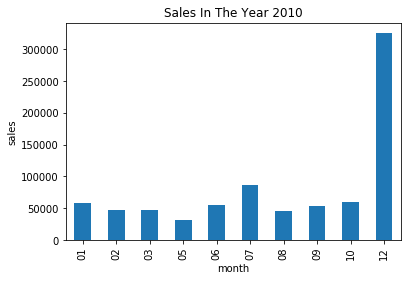

In [29]:
df5.groupby(['month'])['sales'].sum().plot(kind='bar')
plt.title('Sales In The Year 2010')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

# MONTHLY SALES OF THE COMPANY IN 2011

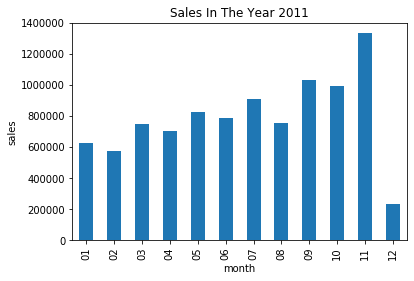

In [30]:
df6.groupby(['month'])['sales'].sum().plot(kind='bar')
plt.title('Sales In The Year 2011')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

# INFERENCE:

@ The Company has maximum number of customers from the United Kingdom which is not surprising because this is an UK based company.<br>

@ The sales are maximum in the United Kingdom compared to all the other countries.<br>

@ Sales in 2010 is less compared to the sales in 2011.<br>

@ There was no sales in the month of April and November in the year 2010.<br>

@ The sales proved be consistantly low till november 2010.There was a sudden rise of sales from December 2010 which lasted until November 2011 , when the company again faced a major drop in sales in December 2011.